In [64]:
# imporitng libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline


In [65]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [66]:
# lets load dataset
df = pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [67]:
# LETS UNDERSTAND ABOUT DATASET
print(f"shape of dataset is {df.shape}")
print("\n ======================================================================\n")
print(f"columns present in the dataset are {df.columns}")
print("\n ======================================================================\n")
print(f"columns present in the dataset with there datatypes\n {df.dtypes}")
print("\n ======================================================================\n")
print(f"information about dataset \n {df.info()}")
print("\n ======================================================================\n")
print(f"data discritbtion of every numerical feature \n{df.describe()}")
print("\n ======================================================================\n")
print(f"data describtion of non numerical datatype \n {df.describe(include=['float64','int64'])}")
print("\n ======================================================================\n")
print(f"numercial columns in dataset are {df.select_dtypes(include = ['float','int']).columns.to_list()}")
print("\n ======================================================================\n")
print(f"non numerical columns in dataset are {df.select_dtypes(include = 'O').columns.to_list()}")

shape of dataset is (244, 7)


columns present in the dataset are Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


columns present in the dataset with there datatypes
 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
information about dataset 
 None


data discritbtion of every numerical feature 
       

## EDA

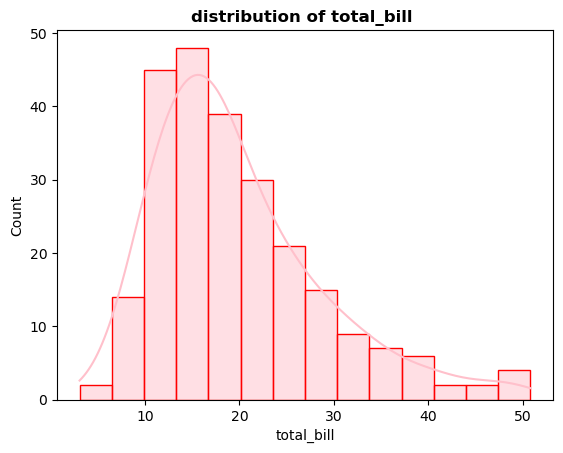

In [68]:
# lets plot the our target feature total_bill
sns.histplot(x= "total_bill",data = df,color="pink",edgecolor = "red",kde = True)
plt.title(f"distribution of total_bill ",fontweight = "bold")
plt.show()

In [69]:
# lets undertsnd the distribution of data values
for col in df.columns:
    print(f"values count for {col} {df[col].value_counts()}")

values count for total_bill total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64
values count for tip tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64
values count for sex sex
Male      157
Female     87
Name: count, dtype: int64
values count for smoker smoker
No     151
Yes     93
Name: count, dtype: int64
values count for day day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
values count for time time
Dinner    176
Lunch      68
Name: count, dtype: int64
values count for size size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


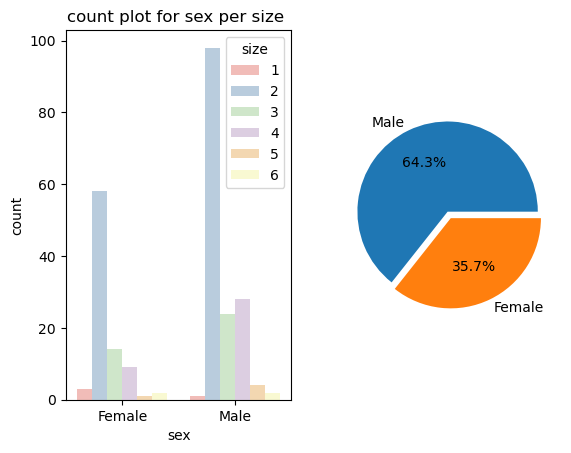

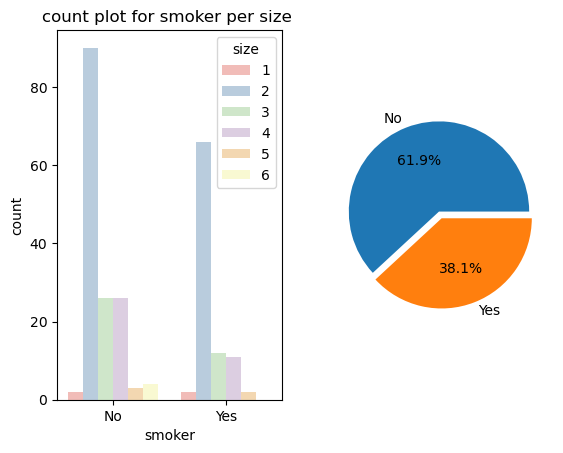

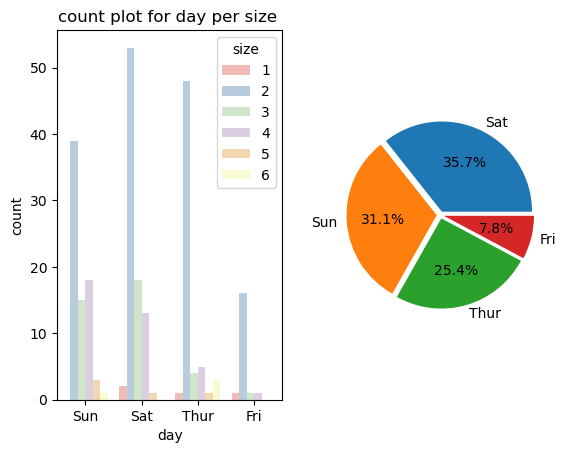

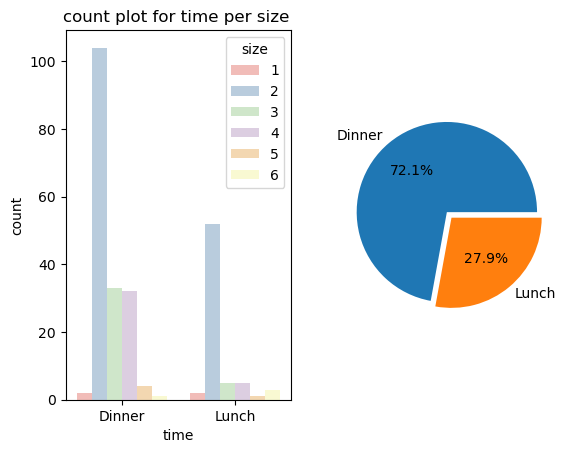

In [70]:
# lets plot the tips size per categorical feature
for col in df.select_dtypes("O"):
    plt.subplot(1,2,1)
    sns.countplot(x= col,data= df,palette="Pastel1",hue= "size")
    plt.title(f"count plot for {col} per size ")
    plt.subplot(1,2,2)
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().index,autopct="%0.01f%%",explode = [0.04]*len(df[col].value_counts()))    
    plt.show()

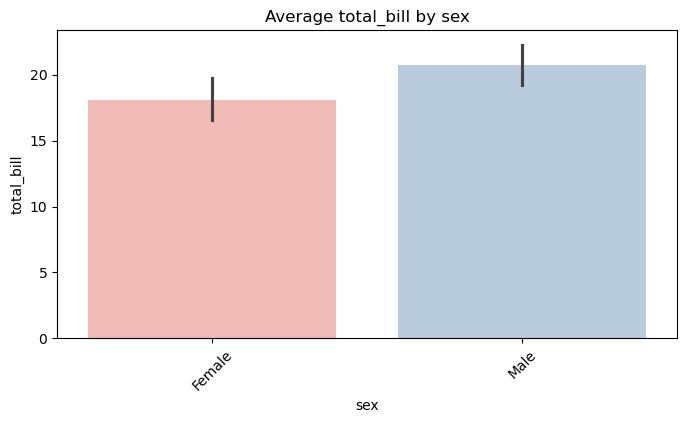

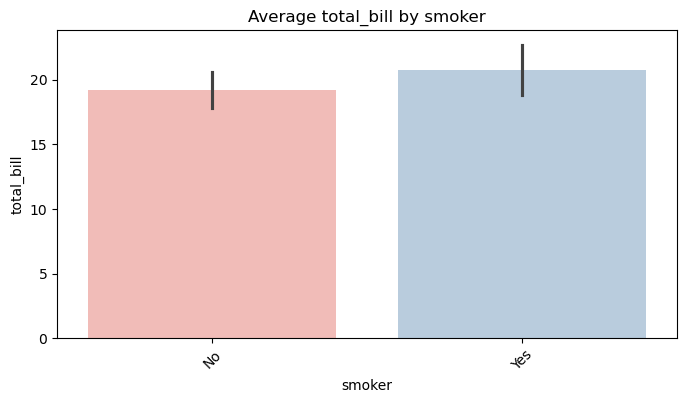

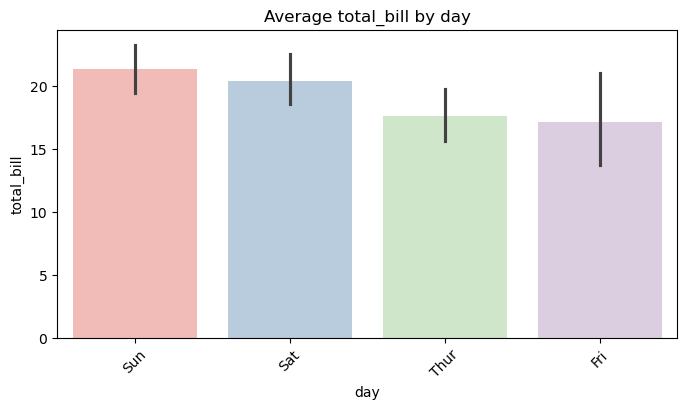

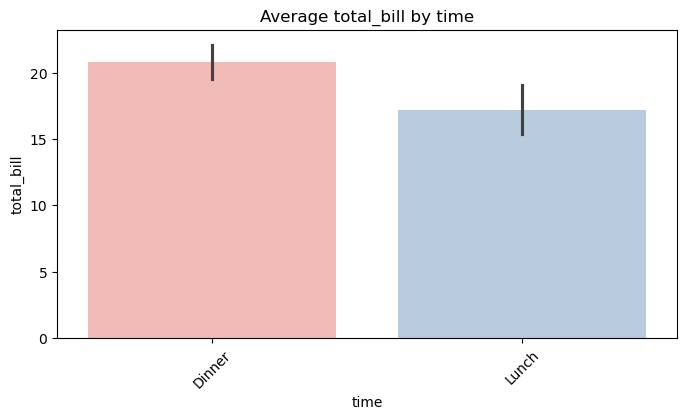

In [71]:
# lets plot the everage for each categorical columns 
for col in df.select_dtypes("O"):   # loop over categorical columns
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y="total_bill", data=df, estimator=np.mean,palette="Pastel1")
    plt.title(f"Average total_bill by {col}")
    plt.xticks(rotation=45)
    plt.show()


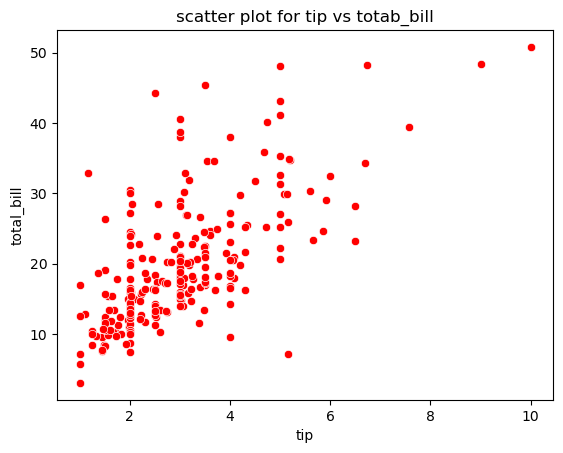

In [72]:
# lets plot for tips vs total_bill
sns.scatterplot(x = "tip",y = "total_bill",data = df ,color = "red")
plt.title("scatter plot for tip vs totab_bill")
plt.show()

## feature eng

In [73]:
# lets  encode the categorical feature 
df = pd.get_dummies(df,columns=df.select_dtypes(include="object").columns,dtype=int,drop_first=True)
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,0,0
240,27.18,2.00,2,0,1,1,0,0,0
241,22.67,2.00,2,1,1,1,0,0,0
242,17.82,1.75,2,1,0,1,0,0,0


In [74]:
# lets split 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns = "tip"),df["tip"],test_size=0.2,random_state=1)



In [75]:
# lets import models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
model = {"lr" : LinearRegression(),
"tree" : DecisionTreeRegressor(),
"ridge" : Ridge(alpha=1),
"lasso" : Lasso(alpha=1)}
model


{'lr': LinearRegression(),
 'tree': DecisionTreeRegressor(),
 'ridge': Ridge(alpha=1),
 'lasso': Lasso(alpha=1)}

In [76]:
# lets train our models
from sklearn.metrics import r2_score,root_mean_squared_error
for name,m in model.items():
    print(f"{name} is training .....\n")
    m.fit(xtrain,ytrain)
    print(f"{name} is sucessfully trained")
    r2score = r2_score(ytest,m.predict(xtest))
    rms = root_mean_squared_error(ytest,m.predict(xtest))
    print(f"r2score for {name} is {r2score} ")
    print(f"root mean square error for {name} is {rms}")
    print("\n\n")

lr is training .....

lr is sucessfully trained
r2score for lr is 0.48758172543494405 
root mean square error for lr is 1.1612712676568797



tree is training .....

tree is sucessfully trained
r2score for tree is 0.027314075428573448 
root mean square error for tree is 1.5999547187470076



ridge is training .....

ridge is sucessfully trained
r2score for ridge is 0.49316592533721315 
root mean square error for ridge is 1.154926319122881



lasso is training .....

lasso is sucessfully trained
r2score for lasso is 0.487501232984634 
root mean square error for lasso is 1.1613624723464346





In [77]:
# lets do normalization 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrainscale = ss.fit_transform(xtrain)
xtestscale = ss.transform(xtest)

In [78]:
for name,m in model.items():
    print(f"{name} is training .....\n")
    m.fit(xtrainscale,ytrain)
    print(f"{name} is sucessfully trained")
    r2score = r2_score(ytest,m.predict(xtestscale))
    rms = root_mean_squared_error(ytest,m.predict(xtestscale))
    print(f"r2score for {name} is {r2score} ")
    print(f"root mean square error for {name} is {rms}")
    print("\n\n")

lr is training .....

lr is sucessfully trained
r2score for lr is 0.4875817254349355 
root mean square error for lr is 1.1612712676568895



tree is training .....

tree is sucessfully trained
r2score for tree is 0.028830105897881597 
root mean square error for tree is 1.5987073860223606



ridge is training .....

ridge is sucessfully trained
r2score for ridge is 0.48783896333419896 
root mean square error for ridge is 1.1609797475297625



lasso is training .....

lasso is sucessfully trained
r2score for lasso is -0.03781942453071929 
root mean square error for lasso is 1.6526552721657704



